<!DOCTYPE html>
<html>
  <body>
    <div align=center>
      <h1><b>Organización de Datos</b></h1>
      <p>Cátedra Rodriguez - 95.58</p>
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/FIUBA_gris_transparente.png/800px-FIUBA_gris_transparente.png" alt="logo" width="300">
      <h2><b>Trabajo Práctico N°1: Reservas de Hotel</b></h2>
    </div>
    <h3>Integrantes del <b>Grupo 17 (Systeam)</b></h3>
    <ul>
        <li>Agha Zadeh Dehdeh, Lucía. P: 106905</li>
        <li>Brizuela, Sebastián. P: 105288</li>
        <li>Del Rio, Juan Sebastián. P: 103337</li>
    </ul>
  </body>
</html>

# Librerías

In [1]:
!pip install keras==2.12.0
!pip uninstall tensorflow -y
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.
Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 100.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 55.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensor

In [2]:
import pandas as pd
import numpy as np

import joblib

import tensorflow as tf
from tensorflow import keras

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos y métricas
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

np.random.seed(1)
tf.random.set_seed(1)

#Configuración warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Dataframe principal

### Carga del dataframe

In [3]:
DF_HOTEL_TRAIN = pd.read_csv("./sample_data/hotel_train_procesado.csv") # Cargamos en memoria el dataset

In [4]:
df_hotel_copy = DF_HOTEL_TRAIN.copy()

###Preprocesamiento

In [5]:
columnas_a_eliminar = [
    "children", "arrival_date_year", "arrival_date_month",
    "arrival_date_week_number", "arrival_date_day_of_month",
    "stays_in_weekend_nights", "stays_in_week_nights", "babies",
    "meal", "adr", "id", "cantidad_personas_total"
]

df_hotel_copy.drop(columnas_a_eliminar, axis="columns", inplace=True)


In [6]:
columnas_categoricas = ["hotel", "country", "reserved_room_type", "assigned_room_type", "deposit_type","agent", 'market_segment', 'distribution_channel', 'customer_type']

#One Hot encoding
df_hotel_copy = pd.get_dummies(df_hotel_copy, columns=columnas_categoricas, drop_first=True)


In [7]:
df_hotel_copy.sort_index(axis="columns", inplace=True) # Reordeno para que coincida el orden con df_hotel_test

## Target

In [8]:
target = "is_canceled"

#Se muestra el porcentaje de aparición de cada clase
df_hotel_copy[target].value_counts(normalize=True) * 100

1    50.221485
0    49.778515
Name: is_canceled, dtype: float64

## División de datos entrenamiento y prueba

In [9]:
df_hotel_copy_x = df_hotel_copy.drop([target], axis="columns" ,inplace=False)

df_hotel_copy_y = df_hotel_copy[target].copy()

x_train, x_test, y_train, y_test = train_test_split(df_hotel_copy_x, df_hotel_copy_y, test_size = 0.2, random_state = 17, stratify = df_hotel_copy[target].values)

print(f"# Datos Entrenamiento: {len(x_train)}")
print(f"# Datos Prueba: {len(x_test)}")

# Datos Entrenamiento: 48220
# Datos Prueba: 12055


#Redes neuronales - modelo 1

In [ ]:
sscaler=StandardScaler()
sscaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_transform_1=sscaler.transform(x_train)
x_test_transform_1=sscaler.transform(x_test)

In [ ]:
from keras.regularizers import l1, l1_l2

# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)

modelo_1 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(d_in,)),
    keras.layers.Dense(100, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu'),
    keras.layers.Dense(100, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu'),
    keras.layers.Dense(100, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

modelo_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                24400     
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
modelo_1.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics=['AUC'],
)

cant_epochs=200
modelo_1.fit(x_train,y_train,epochs=cant_epochs,batch_size=150,verbose=False)

##Resultados

377/377 [==============================] - 0s 957us/step


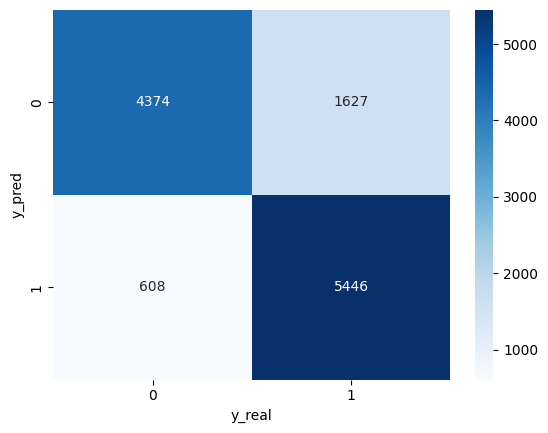

In [ ]:
y_predic_1 = modelo_1.predict(x_test)
y_predic_cat_1 = np.where(y_predic_1>0.5,1,0)   #corte para decidir si cancela o no (0.4 umbral)

ds_validacion=pd.DataFrame(y_predic_cat_1,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt='g')
plt.show()

## Métricas

In [ ]:
#Calculamos las métricas en el conjunto de evaluación
print("Accuracy: ", accuracy_score(y_test, y_predic_cat_1))
print("Recall: ", recall_score(y_test, y_predic_cat_1))
print("Precision: ", precision_score(y_test, y_predic_cat_1))
print("f1 score: ", f1_score(y_test, y_predic_cat_1))

Accuracy:  0.8145997511406056
Recall:  0.8995705318797489
Precision:  0.7699703096281635
f1 score:  0.8297402300601814


#Redes neuronales - modelo 2

In [10]:
# Cargar el modelo desde un archivo Joblib
modelo_rn_2 = joblib.load('modelo_rn_modelo_5.joblib')

In [ ]:
sscaler=StandardScaler()
sscaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_transform_1=sscaler.transform(x_train)
x_test_transform_1=sscaler.transform(x_test)

In [ ]:
from keras.regularizers import l1, l1_l2

# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)

modelo_2 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(d_in,)),
    keras.layers.Dense(100, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu'),
    keras.layers.Dense(100, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu'),
    keras.layers.Dense(100, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

modelo_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                24400     
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
modelo_2.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics=['AUC'],
)

cant_epochs=500
modelo_2.fit(x_train,y_train,epochs=cant_epochs,batch_size=150,verbose=False)

##Resultados

377/377 [==============================] - 1s 2ms/step


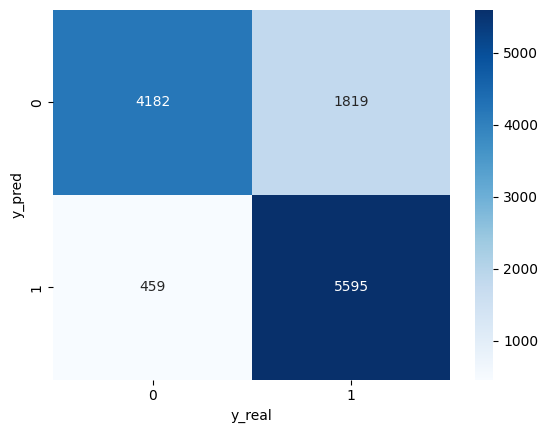

In [11]:
y_predic_2 = modelo_rn_2.predict(x_test)
y_predic_cat_2 = np.where(y_predic_2>0.5,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_2,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt='g')
plt.show()

## Métricas

In [12]:
#Calculamos las métricas en el conjunto de evaluación
print("Accuracy: ", accuracy_score(y_test, y_predic_cat_2))
print("Recall: ", recall_score(y_test, y_predic_cat_2))
print("Precision: ", precision_score(y_test, y_predic_cat_2))
print("f1 score: ", f1_score(y_test, y_predic_cat_2))

Accuracy:  0.8110327664869349
Recall:  0.9241823587710605
Precision:  0.7546533585109253
f1 score:  0.8308583308583309


#Redes neuronales - modelo 3

In [14]:
# Cargar el modelo desde un archivo Joblib
modelo_rn_3 = joblib.load('modelo_rn_modelo_3.joblib')

In [ ]:
sscaler=StandardScaler()
sscaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_transform_1=sscaler.transform(x_train)
x_test_transform_1=sscaler.transform(x_test)

In [ ]:
from keras.regularizers import l1

# calcula la cantidad de clases
cant_clases=len(np.unique(y_train))
d_in=len(x_train.columns)

modelo_3 = keras.Sequential([
    keras.layers.Dense(25,input_shape=(d_in,)),
    keras.layers.Dense(25, kernel_regularizer=l1(0.01)),
    keras.layers.Dense(25, kernel_regularizer=l1(0.01)),
    keras.layers.Dense(1, activation='sigmoid')])

modelo_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                24400     
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
modelo_3.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.01),
  loss='binary_crossentropy',
  metrics=['acc'],
)

cant_epochs=100
modelo_3.fit(x_train,y_train,epochs=cant_epochs,batch_size=50,verbose=False)

##Resultados

377/377 [==============================] - 1s 1ms/step


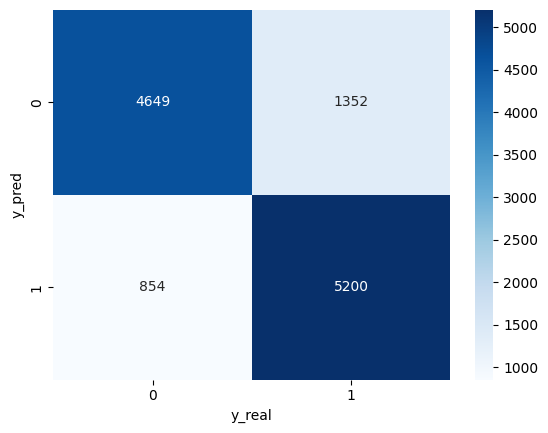

In [15]:
y_predic_3 = modelo_rn_3.predict(x_test)
y_predic_cat_3 = np.where(y_predic_3>0.5,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_3,y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt='g')
plt.show()

## Métricas

In [16]:
#Calculamos las métricas en el conjunto de evaluación
print("Accuracy: ", accuracy_score(y_test, y_predic_cat_3))
print("Recall: ", recall_score(y_test, y_predic_cat_3))
print("Precision: ", precision_score(y_test, y_predic_cat_3))
print("f1 score: ", f1_score(y_test, y_predic_cat_3))

Accuracy:  0.8170053919535463
Recall:  0.8589362405021473
Precision:  0.7936507936507936
f1 score:  0.8250039663652229


# Predicción con DF_HOTEL_TEST

### Carga del DataFrame TEST

In [ ]:
DF_HOTEL_TEST = pd.read_csv(("./sample_data/hotels_test.csv"))

In [ ]:
df_hotel_test_copy = DF_HOTEL_TEST.copy()

## Preprocesamiento

### Tratamiento de datos faltantes

In [ ]:
df_hotel_test_copy['agent'] = df_hotel_test_copy['agent'].fillna("Agencia no existe")

df_hotel_test_copy['country'] = df_hotel_test_copy['country'].fillna(df_hotel_test_copy['country'].mode()[0])

### Eliminación de variables irrelavantes y/o con datos faltantes

In [ ]:
columnas_a_eliminar = [
    "children", "arrival_date_year", "arrival_date_month",
    "arrival_date_week_number", "arrival_date_day_of_month",
    "stays_in_weekend_nights", "stays_in_week_nights", "babies",
    "meal", "adr", "id", "company"
]
df_hotel_test_copy.drop(columnas_a_eliminar, axis="columns", inplace=True)

### Transformación de las variables categoricas

In [ ]:
#One Hot encoding
df_hotel_test_copy = pd.get_dummies(df_hotel_test_copy, columns=columnas_categoricas, drop_first=True)

## Emparejamiento de los dataframes

In [ ]:
columnas_df_train = set(df_hotel_copy.columns) # Obtiene las columnas del primer DataFrame
columnas_df_test = set(df_hotel_test_copy.columns) # Obtiene las columnas del segundo DataFrame

In [ ]:
columnas_distintas = columnas_df_test.difference(columnas_df_train) # Encuentra las columnas que son distintas entre los DataFrames
print(columnas_distintas)

{'agent_282.0', 'country_DJI', 'country_SLV', 'agent_135.0', 'agent_469.0', 'country_DMA', 'agent_165.0', 'agent_510.0', 'country_KHM', 'country_ASM', 'agent_232.0', 'agent_213.0', 'country_NIC', 'assigned_room_type_P', 'agent_358.0', 'country_TMP', 'agent_363.0', 'country_UZB', 'agent_331.0', 'agent_122.0', 'agent_367.0', 'reserved_room_type_P', 'country_MLI', 'country_SMR', 'agent_150.0', 'agent_444.0', 'agent_337.0', 'agent_397.0', 'reservation_status_date', 'country_BFA', 'country_ATF', 'agent_211.0'}


In [ ]:
df_hotel_test_copy.drop(columnas_distintas, axis="columns", inplace=True) ##DESPUES CAMBIAR SOLUCIÓN

In [ ]:
columnas_distintas = columnas_df_train.difference(columnas_df_test) # Encuentra las columnas que son distintas entre los DataFrames
print(columnas_distintas)

{'is_canceled', 'agent_291.0', 'agent_352.0', 'country_AZE', 'agent_214.0', 'agent_449.0', 'assigned_room_type_L', 'market_segment_Undefined', 'agent_461.0', 'country_MDG', 'country_ZMB', 'country_GTM', 'agent_418.0', 'distribution_channel_Undefined', 'country_PYF', 'agent_114.0', 'agent_173.0', 'country_KNA', 'agent_509.0', 'agent_244.0', 'agent_451.0', 'agent_247.0', 'agent_404.0', 'agent_24.0', 'country_FJI', 'agent_333.0', 'agent_476.0', 'agent_388.0', 'agent_472.0', 'country_MNE', 'agent_283.0', 'agent_483.0', 'agent_416.0', 'agent_481.0', 'country_KEN', 'country_VGB', 'country_SYC', 'country_COM', 'agent_391.0', 'agent_431.0', 'agent_427.0', 'agent_414.0', 'agent_289.0', 'country_ETH', 'country_MYT', 'agent_278.0', 'agent_430.0', 'country_BEN', 'agent_432.0', 'agent_497.0', 'agent_267.0', 'agent_197.0', 'country_UMI', 'agent_535.0', 'agent_179.0', 'country_SDN', 'agent_321.0', 'country_PAN', 'agent_265.0', 'agent_144.0', 'agent_405.0', 'agent_93.0', 'country_HND', 'country_NAM', 

In [ ]:
for columna in columnas_distintas:
  df_hotel_test_copy[columna] = 0

In [ ]:
df_hotel_test_copy.drop(["is_canceled"], axis="columns", inplace=True)

### Reordenamiento

In [ ]:
df_hotel_test_copy.sort_index(axis="columns", inplace=True)

## Predicción del conjunto de test y submits para la competencia Kaggle

In [ ]:
test_pred = modelo_1.predict(df_hotel_test_copy)
y_test_predic_cat_1 = np.where(test_pred>0.4,1,0).flatten() #Lo convierto para que sea unidimensional, (raro)
print(y_test_predic_cat_1)

830/830 [==============================] - 1s 924us/step
[1 1 0 ... 1 1 0]


### Resultado

In [ ]:
df_resultado = pd.DataFrame(
    {"id": DF_HOTEL_TEST["id"],
    "is_canceled": y_test_predic_cat_1}
)

In [ ]:
df_resultado.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


### Exportación

In [ ]:
df_resultado.to_csv("resultado_rn_modelo_7.csv", index=False)

# Guardado del modelo

In [ ]:
joblib.dump(modelo_1, "modelo_rn_modelo_7.joblib")

['modelo_rn_modelo_7.joblib']